In [2]:
import pandas as pd
import cot_reports as cot
import warnings
warnings.filterwarnings('ignore')

"COT Legacy Futures Only" tai tikrai yra susijęs su Commodity Futures Trading Commission (CFTC) paskelbtais anglų kalba rinkos dalyvių ataskaitų (Commitments of Traders, COT) duomenimis. Šios ataskaitos yra svarbus įrankis, skirtas stebėti ir analizuoti ateities sandorių rinkoje dalyvaujančių subjektų pozicijas ir jų pasikeitimus, tačiau reikia atkreipti dėmesį į "non-commercial" (nekomercinių subjektų) dalyvius ir jų svarbą.

**Nekomerciniai subjektai (Non-Commercial Traders):** Tai yra viena iš trijų pagrindinių grupių, į kurias yra suskirstyti rinkos dalyviai COT ataskaitose. Nekomerciniai subjektai yra investuotojai ir spekuliantai, kurie dalyvauja ateities sandorių rinkoje ne dėl prekybos arba komercinių poreikių, o siekdami pelno iš kainų svyravimų. Ši grupė apima hedge fondo valdytojus, investicinius bankus ir kitus investuotojus.



COT ataskaitos yra išsamus įrankis, kuris leidžia analizuoti ir suprasti rinkos dalyvių elgesį, ypač kai atsižvelgiama į komercinius  subjektus. Tai suteikia informacijos prekybininkams ir investuotojams, padedančios priimti prekybos sprendimus ir prognozuoti ateities rinkų kainų judėjimą.

In [3]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("publicreporting.cftc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(publicreporting.cftc.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("6dca-aqww", limit=237605)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head()


,id,market_and_exchange_names,report_date_as_yyyy_mm_dd,yyyy_report_week_ww,contract_market_name,cftc_contract_market_code,cftc_market_code,cftc_region_code,cftc_commodity_code,commodity_name,...,conc_gross_le_8_tdr_short_2,conc_net_le_4_tdr_long_other,conc_net_le_4_tdr_short_other,conc_net_le_8_tdr_long_other,conc_net_le_8_tdr_short_other,contract_units,commodity,commodity_subgroup_name,commodity_group_name,futonly_or_combined
0,220906001626F,WHEAT-HRSpring - MINNEAPOLIS GRAIN EXCHANGE,2022-09-06T00:00:00.000,2022 Report Week 36,WHEAT-HRSpring,001626,MGE,CHI,001,WHEAT,...,39.2,77.6,28.2,87.0,39.2,"(CONTRACTS OF 5,000 BUSHELS)",WHEAT,GRAINS,AGRICULTURE,FutOnly
1,220906001602F,WHEAT-SRW - CHICAGO BOARD OF TRADE,2022-09-06T00:00:00.000,2022 Report Week 36,WHEAT-SRW,001602,CBT,CHI,001,WHEAT,...,34.4,36.4,14.9,48.2,24.5,"(CONTRACTS OF 5,000 BUSHELS)",WHEAT,GRAINS,AGRICULTURE,FutOnly
2,220906001612F,WHEAT-HRW - CHICAGO BOARD OF TRADE,2022-09-06T00:00:00.000,2022 Report Week 36,WHEAT-HRW,001612,CBT,CHI,001,WHEAT,...,31.5,41.4,20.0,55.8,30.0,"(CONTRACTS OF 5,000 BUSHELS)",WHEAT,GRAINS,AGRICULTURE,FutOnly
3,220906002602F,CORN - CHICAGO BOARD OF TRADE,2022-09-06T00:00:00.000,2022 Report Week 36,CORN,002602,CBT,CHI,002,CORN,...,27.0,40.2,18.7,54.6,26.7,"(CONTRACTS OF 5,000 BUSHELS)",CORN,GRAINS,AGRICULTURE,FutOnly
4,220906004603F,OATS - CHICAGO BOARD OF TRADE,2022-09-06T00:00:00.000,2022 Report Week 36,OATS,004603,CBT,CHI,004,OATS,...,61.5,0.0,61.5,0.0,61.5,"(CONTRACTS OF 5,000 BUSHELS)",OATS,GRAINS,AGRICULTURE,FutOnly


In [4]:
df_2023 = results_df[results_df['report_date_as_yyyy_mm_dd'].str.startswith('2023')]
#df_2023.head()


In [5]:
unique_commodities = df_2023['commodity_name'].unique()

print(unique_commodities)

['ELECTRICITY' 'NATURAL GAS' 'LUMBER' 'ALUMINUM' 'POLLUTION' 'CRUDE OIL'
 'BITCOIN' 'COBALT' 'FUEL OIL' 'ETHER' 'ETHANOL' 'NATURAL GAS LIQUIDS'
 'U.S. DOLLAR INDEX' 'LITHIUM' 'T-NOTES, 6.5-10 YEAR' 'MILK'
 'NAPHTHA/CRUDE OIL' 'GASOLINE' 'WHEAT' 'CORN' 'OATS' 'SOYBEANS'
 'SOYBEAN OIL' 'T-BONDS' 'HEATING OIL-DIESEL-GASOIL' 'SOYBEAN MEAL'
 'COTTON' 'PALM OIL' 'RICE' 'FROZEN CONCENTRATED ORANGE JUICE'
 'T-NOTES, 1-2 YEAR' 'T-NOTES, 4-6 YEAR' '30 DAY RATES' 'BUTTER'
 'LEAN HOGS' 'LIVE CATTLE' 'FEEDER CATTLE' 'CHEESE' 'COCOA' 'PALLADIUM'
 'PLATINUM' 'SUGAR' 'COFFEE' 'SILVER' 'COPPER' 'GOLD' 'CANADIAN DOLLAR'
 'SWISS FRANC' 'MEXICAN PESO' 'POUND STERLING' 'JAPANESE YEN'
 'EUROPEAN CURRENCY UNIT' 'BRAZILIAN REAL' 'NEW ZEALAND DOLLAR'
 'VOLATILITY/VARIANCE INDEX' 'SOUTH AFRICAN RAND'
 'DOW JONES BROAD BASED INDICES' 'EURODOLLARS'
 'SECURED OVERNIGHT FINANCING RATE' 'CANOLA  AND PRODUCTS'
 'S&P BROAD BASED STOCK INDICES' 'STEEL' 'NASDAQ  BROADBASED INDICES'
 'BLOOMBERG COMMODITY INDEX' 'AUSTRALI

In [6]:
filtered_df = df_2023[df_2023['contract_market_name'] == "EURO FX"]
filtered_df.head()

,id,market_and_exchange_names,report_date_as_yyyy_mm_dd,yyyy_report_week_ww,contract_market_name,cftc_contract_market_code,cftc_market_code,cftc_region_code,cftc_commodity_code,commodity_name,...,conc_gross_le_8_tdr_short_2,conc_net_le_4_tdr_long_other,conc_net_le_4_tdr_short_other,conc_net_le_8_tdr_long_other,conc_net_le_8_tdr_short_other,contract_units,commodity,commodity_subgroup_name,commodity_group_name,futonly_or_combined
227107,230103099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-03T00:00:00.000,2023 Report Week 01,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
227366,230110099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-10T00:00:00.000,2023 Report Week 02,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
227627,230117099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-17T00:00:00.000,2023 Report Week 03,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
227905,230124099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-24T00:00:00.000,2023 Report Week 04,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
228180,230131099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-31T00:00:00.000,2023 Report Week 05,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly


In [7]:
eur_data = filtered_df[filtered_df['contract_market_name'] == "EURO FX"]
non_commercial_eur_data = eur_data[['report_date_as_yyyy_mm_dd',
                                    'contract_market_name', 
                                    'noncomm_positions_long_all',
                                    'noncomm_positions_short_all', 
                               ]]
non_commercial_eur_data.head()


,report_date_as_yyyy_mm_dd,contract_market_name,noncomm_positions_long_all,noncomm_positions_short_all
227107,2023-01-03T00:00:00.000,EURO FX,222543,92628
227366,2023-01-10T00:00:00.000,EURO FX,238623,103641
227627,2023-01-17T00:00:00.000,EURO FX,228279,101295
227905,2023-01-24T00:00:00.000,EURO FX,237743,103394
228180,2023-01-31T00:00:00.000,EURO FX,246755,96246


In [8]:
eur_data = filtered_df[filtered_df['contract_market_name'] == "EURO FX"]

non_commercial_eur_data = eur_data[['report_date_as_yyyy_mm_dd',
                                   'contract_market_name', 
                                   'noncomm_positions_long_all',
                                   'noncomm_positions_short_all']]

# suskaiciuoju skirtumus tarp long and short poziciju
non_commercial_eur_data['long_change'] = non_commercial_eur_data['noncomm_positions_long_all'].astype(int).diff()
non_commercial_eur_data['short_change'] = non_commercial_eur_data['noncomm_positions_short_all'].astype(int).diff()

# suskaiciuoju net pozicijas
non_commercial_eur_data['net_positions'] = non_commercial_eur_data['noncomm_positions_long_all'].astype(int) - non_commercial_eur_data['noncomm_positions_short_all'].astype(int)

df_sorted = non_commercial_eur_data.sort_values(by='report_date_as_yyyy_mm_dd', ascending=False)
# df_sorted.head(50)



In [9]:
df_sorted.rename(columns={
    'report_date_as_yyyy_mm_dd': 'Report Date',
    'contract_market_name': 'Contract Market',
    'noncomm_positions_long_all': 'Non-Commercial Long Positions',
    'noncomm_positions_short_all': 'Non-Commercial Short Positions',
    'long_change': 'Change in Long Positions',
    'short_change': 'Change in Short Positions',
    'net_positions': 'Net Positions'
}, inplace=True)


df_sorted.head(50)


,Report Date,Contract Market,Non-Commercial Long Positions,Non-Commercial Short Positions,Change in Long Positions,Change in Short Positions,Net Positions
237562,2023-09-19T00:00:00.000,EURO FX,207424,105443,-4952.0,6147.0,101981
237272,2023-09-12T00:00:00.000,EURO FX,212376,99296,-23356.0,-205.0,113080
236985,2023-09-05T00:00:00.000,EURO FX,235732,99501,5190.0,15638.0,136231
236692,2023-08-29T00:00:00.000,EURO FX,230542,83863,-8849.0,3232.0,146679
236393,2023-08-22T00:00:00.000,EURO FX,239391,80631,6925.0,8028.0,158760
236107,2023-08-15T00:00:00.000,EURO FX,232466,72603,4418.0,-5634.0,159863
235819,2023-08-08T00:00:00.000,EURO FX,228048,78237,-12026.0,10225.0,149811
235541,2023-08-01T00:00:00.000,EURO FX,240074,68012,-10573.0,-5405.0,172062
235244,2023-07-25T00:00:00.000,EURO FX,250647,73417,-13867.0,-12265.0,177230
234950,2023-07-18T00:00:00.000,EURO FX,264514,85682,40163.0,1493.0,178832


In [10]:
#convertuoju i datetime formata
non_commercial_eur_data['report_date_as_yyyy_mm_dd'] = pd.to_datetime(non_commercial_eur_data['report_date_as_yyyy_mm_dd'])

# palieku tik data be laiko
non_commercial_eur_data['report_date_as_yyyy_mm_dd'] = non_commercial_eur_data['report_date_as_yyyy_mm_dd'].dt.date

#print(non_commercial_eur_data['report_date_as_yyyy_mm_dd'])


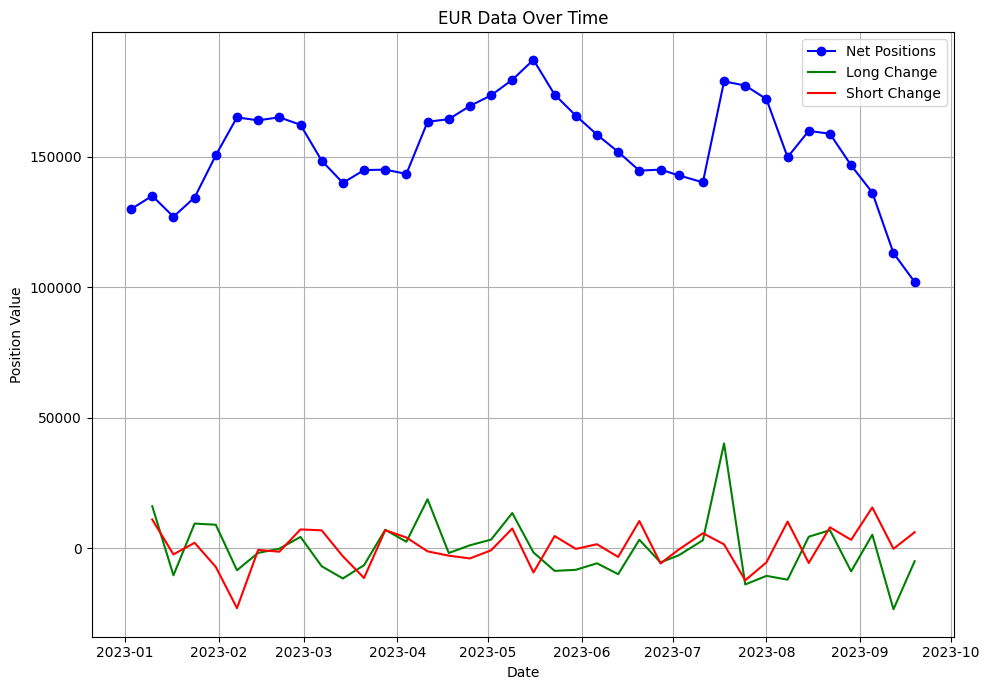

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# 'net_positions' su marker
non_commercial_eur_data.plot(x='report_date_as_yyyy_mm_dd', y='net_positions', kind='line', label='Net Positions', color='blue', marker='o', ax=plt.gca())

# 'long_change' column
non_commercial_eur_data.plot(x='report_date_as_yyyy_mm_dd', y='long_change', kind='line', label='Long Change', color='green', ax=plt.gca())

# 'short_change' column
non_commercial_eur_data.plot(x='report_date_as_yyyy_mm_dd', y='short_change', kind='line', label='Short Change', color='red', ax=plt.gca())

plt.title("EUR Data Over Time")
plt.ylabel("Position Value")
plt.xlabel("Date")
plt.grid(True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()


"Susitvarkius duomenų baze ir išsitraukus reikiamus duomenis, matome, jog Net pozicijos yra teigiamos per visą periodą nuo mūsų testavimo pradžios (ziureti tik iki  iki 2023.08). Ši sąvoka nurodo, kad dauguma nekomercinių (t. y., spekuliantų) dalyvių rinkoje laikosi pozicijų, tikėdamiesi, kad tam tikro finansinio instrumento vertė augs. Žinant, kad hedge fondo valdytojai, investiciniai bankai ir kiti dideli investuotojai yra vieni didžiausių rinkos dalyvių, kaip praktika rodo, verta "prisislieti" prie jų. Kitaip tariant, jie yra optimistai dėl rinkos krypties ir tikisi, kad jų ilgosios pozicijos (t. y., pirktos pozicijos) atneš pelno."